<h3>STEP 1: Import Libraries</h3>

In [1]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Show plots inline
%matplotlib inline

<h3>STEP 2: Load Dataset</h3>

In [3]:
df = pd.read_csv("/content/googleplaystore.csv")

In [10]:
import warnings
warnings.filterwarnings("ignore")

<h3>Check structure</h3>

In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<h3>Data Cleaning</h3>

In [13]:
# Missing values
print(df.isnull().sum())

# Drop rows missing critical values
df.dropna(subset=["Rating", "Reviews", "Size", "Installs"], inplace=True)

# Convert Reviews to integer
df["Reviews"] = df["Reviews"].astype(str).str.replace("M","000000").astype(float)

# Convert Installs: remove ',' and '+'
df["Installs"] = df["Installs"].astype(str).str.replace(",","").str.replace("+","")
df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce")

# Convert Price: remove '$'
df["Price"] = df["Price"].astype(str).str.replace("$","")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Convert Size column into MB
def convert_size(size):
    if "M" in str(size):
        return float(str(size).replace("M",""))
    elif "k" in str(size):
        return float(str(size).replace("k",""))/1000
    else:
        return np.nan

df["Size"] = df["Size"].apply(convert_size)

# Drop duplicates
df.drop_duplicates(inplace=True)

App                  0
Category             0
Rating               0
Reviews              0
Size              1469
Installs             1
Type                 0
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          4
Android Ver          3
dtype: int64


<h3>Exploratory Data Analysis (EDA) + Graphs</h3>

<h3>Distribution of Ratings</h3>

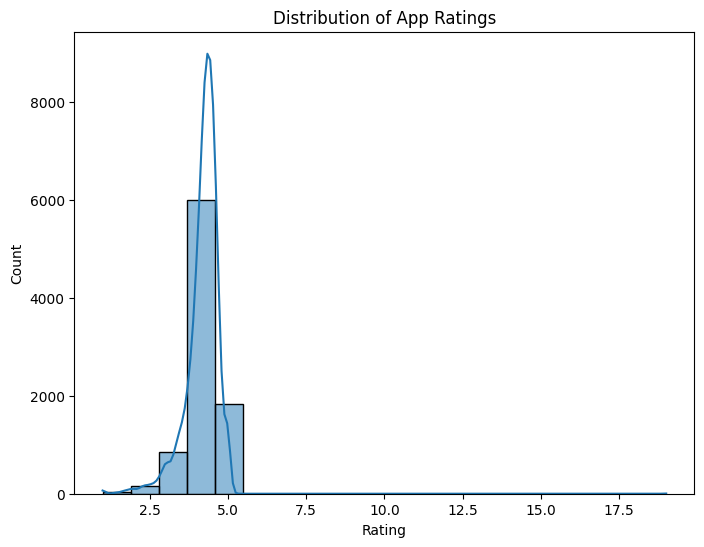

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(df["Rating"].dropna(), bins=20, kde=True)
plt.title("Distribution of App Ratings")
plt.show()

<h3>Top 10 Categories</h3>

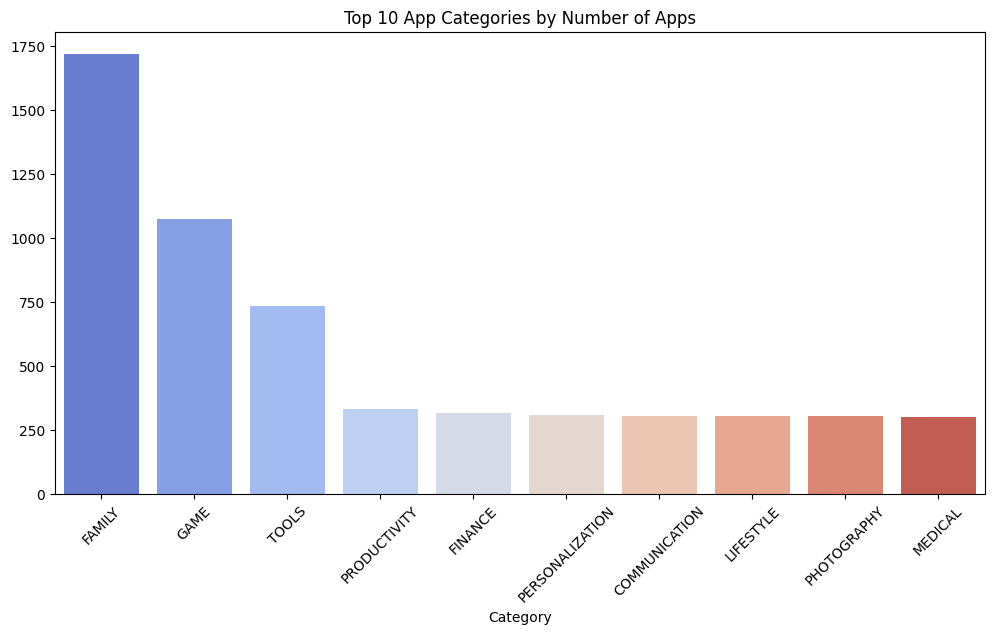

In [11]:
plt.figure(figsize=(12,6))
top_categories = df["Category"].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette="coolwarm")
plt.title("Top 10 App Categories by Number of Apps")
plt.xticks(rotation=45)
plt.show()


<h3>Free vs Paid Apps</h3>

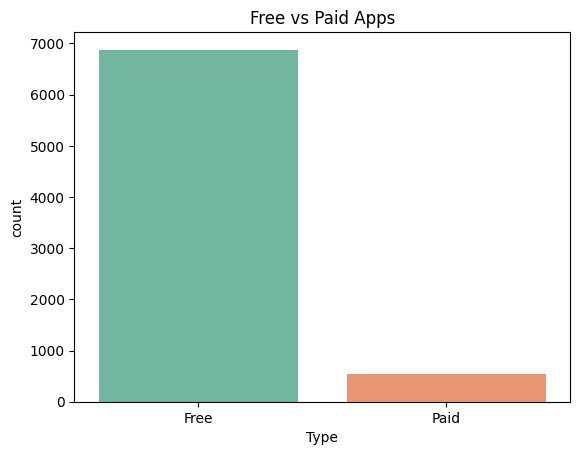

In [14]:
sns.countplot(x="Type", data=df, palette="Set2")
plt.title("Free vs Paid Apps")
plt.show()

<h3>Reviews vs Rating</h3>

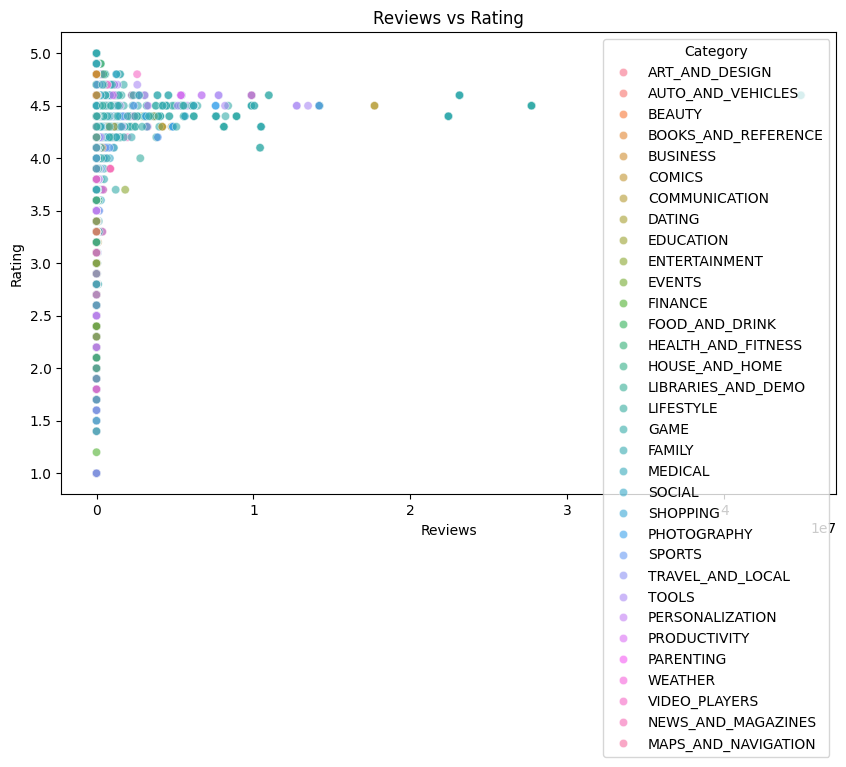

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Reviews", y="Rating", data=df, hue="Category", alpha=0.6)
plt.title("Reviews vs Rating")
plt.show()

<h3>Price Distribution for Paid Apps</h3>

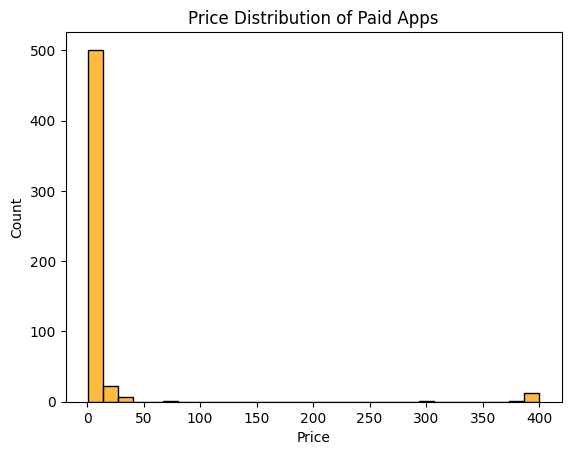

In [16]:
paid_apps = df[df["Type"]=="Paid"]
sns.histplot(paid_apps["Price"], bins=30, color="orange")
plt.title("Price Distribution of Paid Apps")
plt.show()

<h3>Content Rating Distribution</h3>

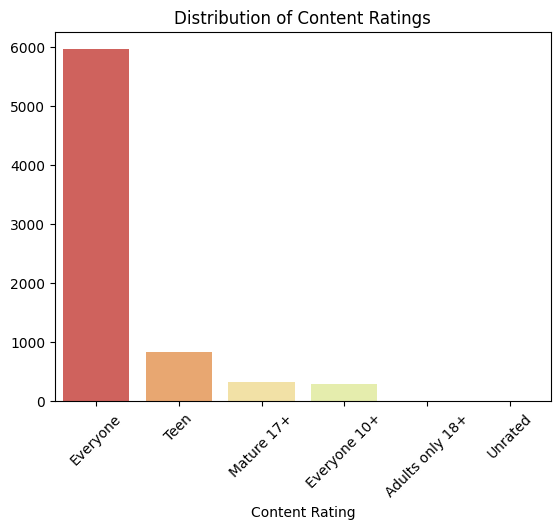

In [17]:
content_counts = df["Content Rating"].value_counts()
sns.barplot(x=content_counts.index, y=content_counts.values, palette="Spectral")
plt.title("Distribution of Content Ratings")
plt.xticks(rotation=45)
plt.show()

<h3>Top Genres by Installs</h3>

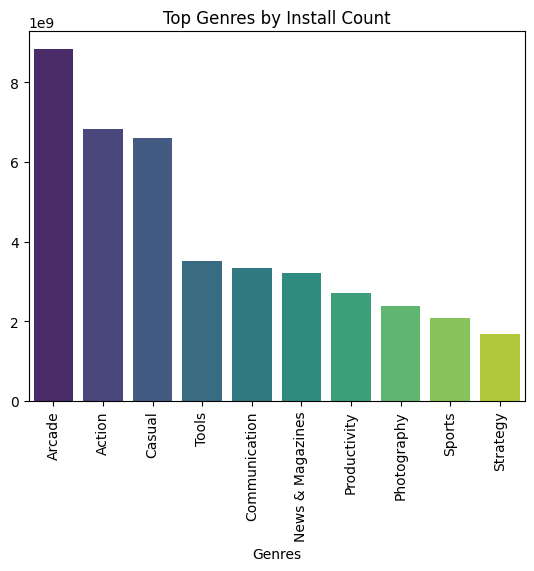

In [18]:
top_genres = df.groupby("Genres")["Installs"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Top Genres by Install Count")
plt.show()

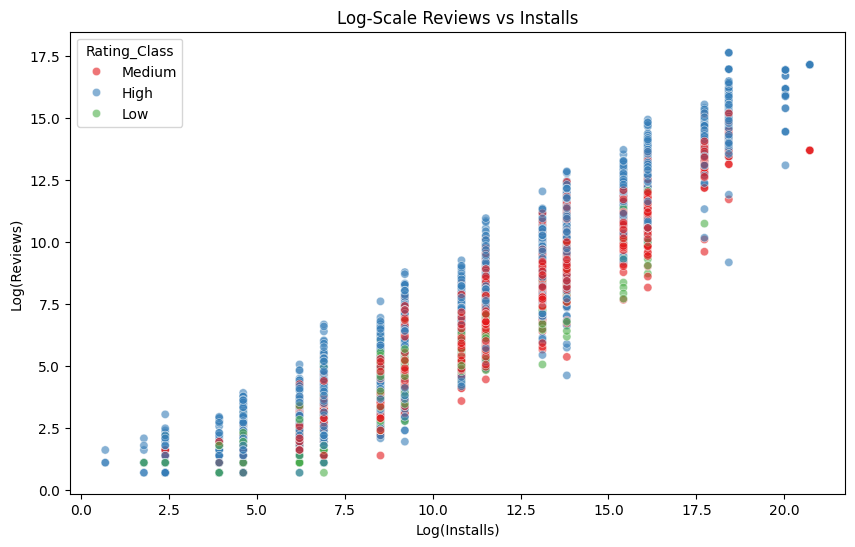

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=np.log1p(df["Installs"]), y=np.log1p(df["Reviews"]), hue=df["Rating_Class"], alpha=0.6, palette="Set1")
plt.title("Log-Scale Reviews vs Installs")
plt.xlabel("Log(Installs)")
plt.ylabel("Log(Reviews)")
plt.show()

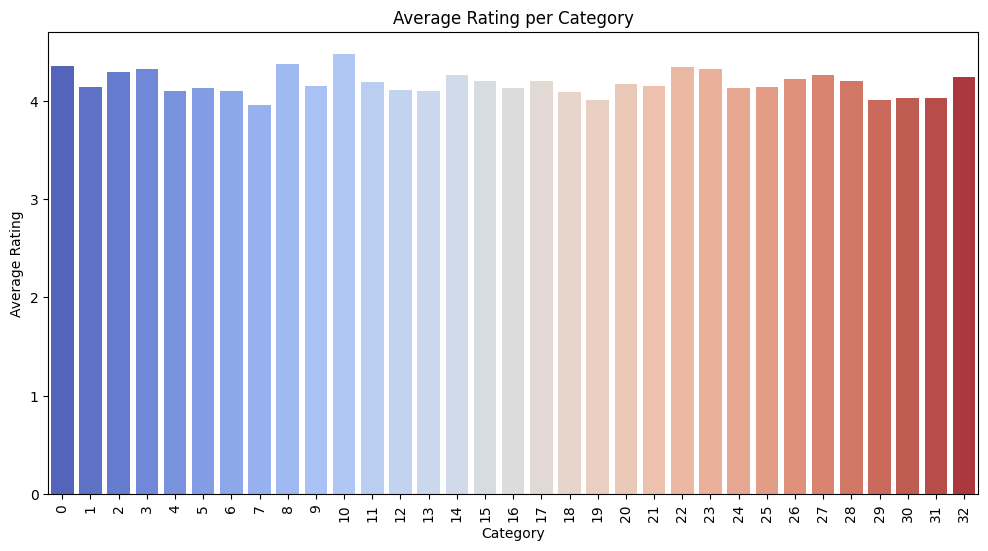

In [31]:
plt.figure(figsize=(12,6))
avg_rating = df.groupby("Category")["Rating"].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Average Rating per Category")
plt.ylabel("Average Rating")
plt.show()

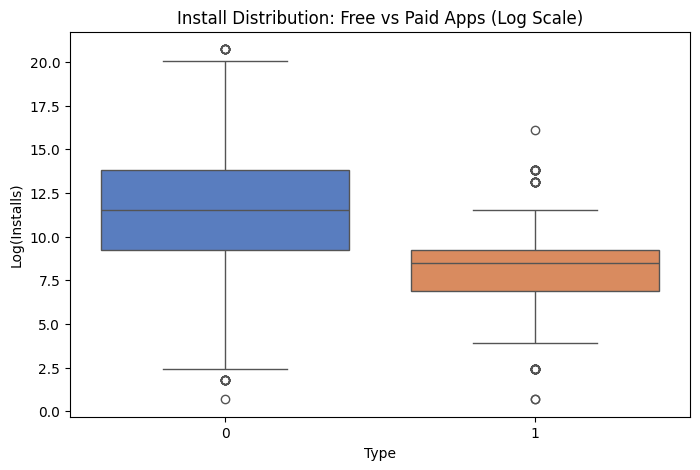

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Type", y=np.log1p(df["Installs"]), data=df, palette="muted")
plt.title("Install Distribution: Free vs Paid Apps (Log Scale)")
plt.ylabel("Log(Installs)")
plt.show()

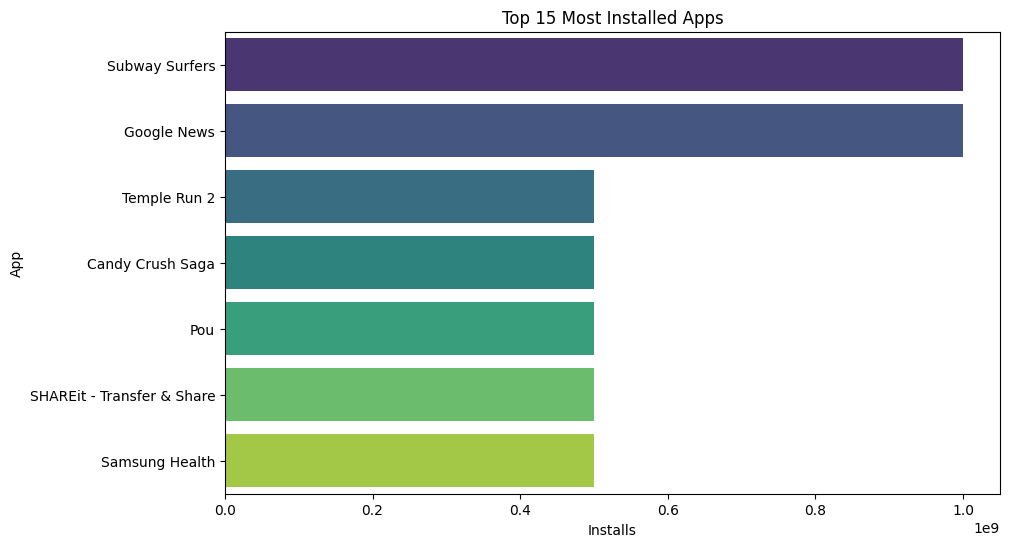

In [33]:
top_installed = df.sort_values("Installs", ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(x="Installs", y="App", data=top_installed, palette="viridis")
plt.title("Top 15 Most Installed Apps")
plt.show()

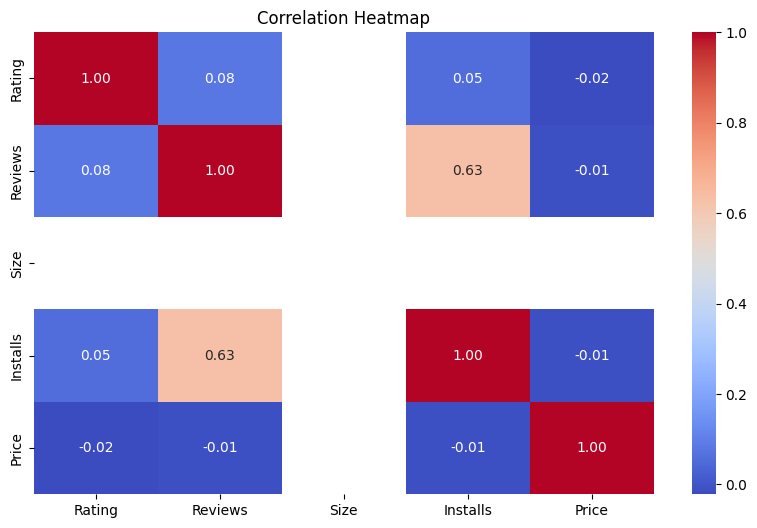

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df[["Rating","Reviews","Size","Installs","Price"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

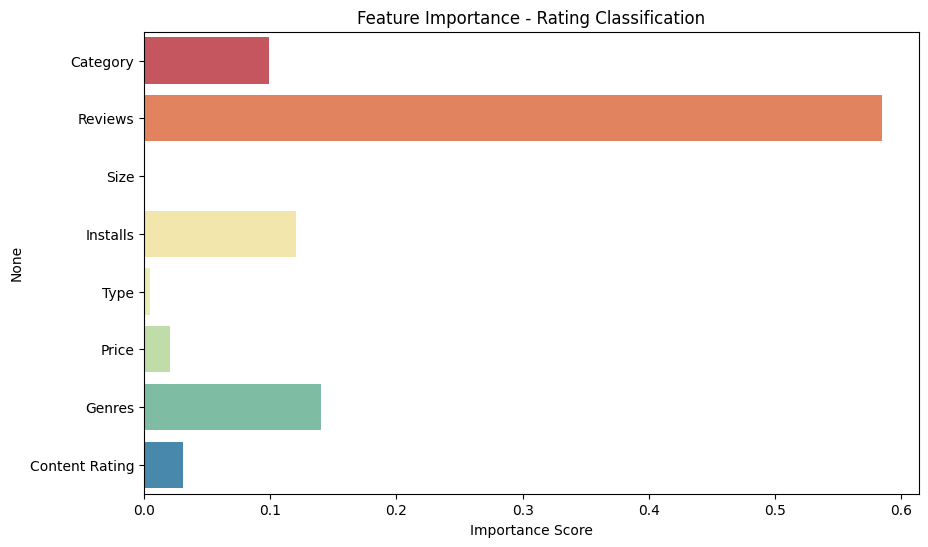

In [35]:
importances = clf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names, palette="Spectral")
plt.title("Feature Importance - Rating Classification")
plt.xlabel("Importance Score")
plt.show()

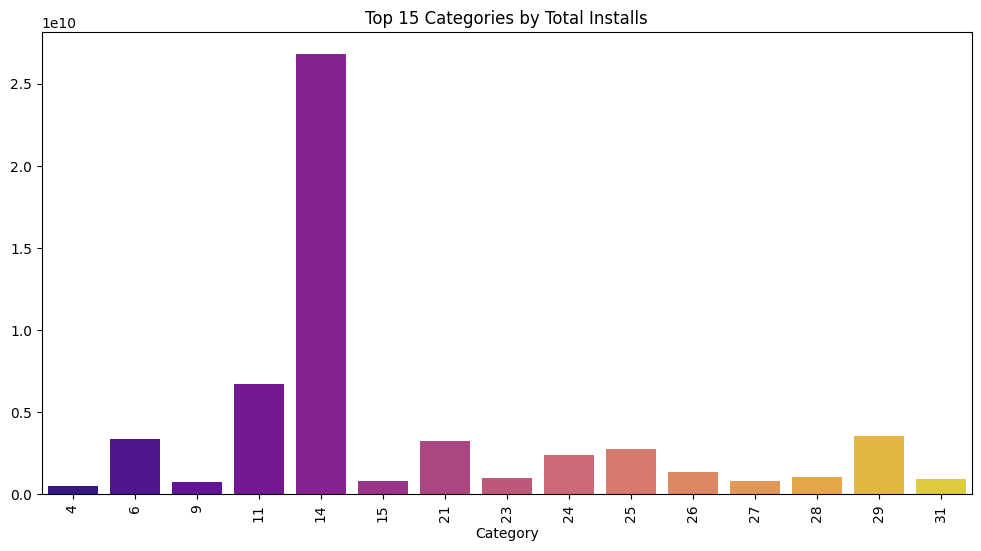

In [36]:
plt.figure(figsize=(12,6))
cat_installs = df.groupby("Category")["Installs"].sum().sort_values(ascending=False).head(15)
sns.barplot(x=cat_installs.index, y=cat_installs.values, palette="plasma")
plt.xticks(rotation=90)
plt.title("Top 15 Categories by Total Installs")
plt.show()

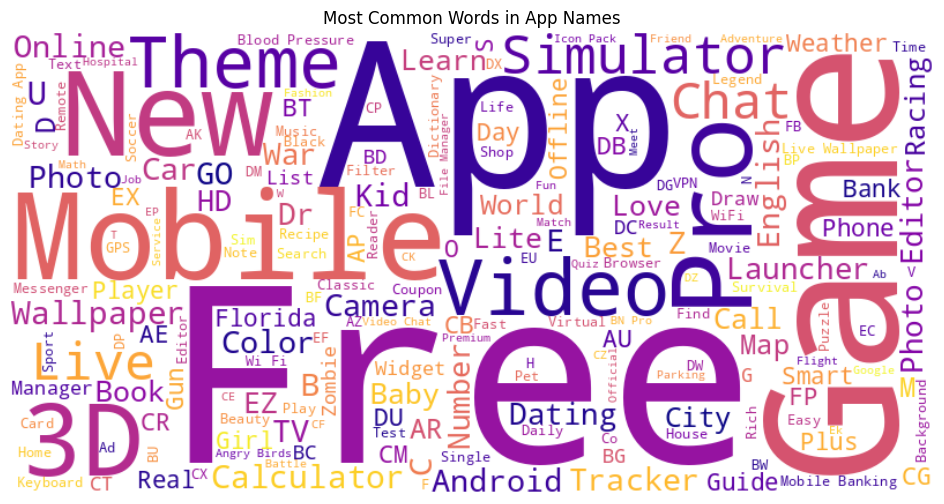

In [37]:
from wordcloud import WordCloud

text = " ".join(df["App"].dropna().astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="plasma").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in App Names")
plt.show()

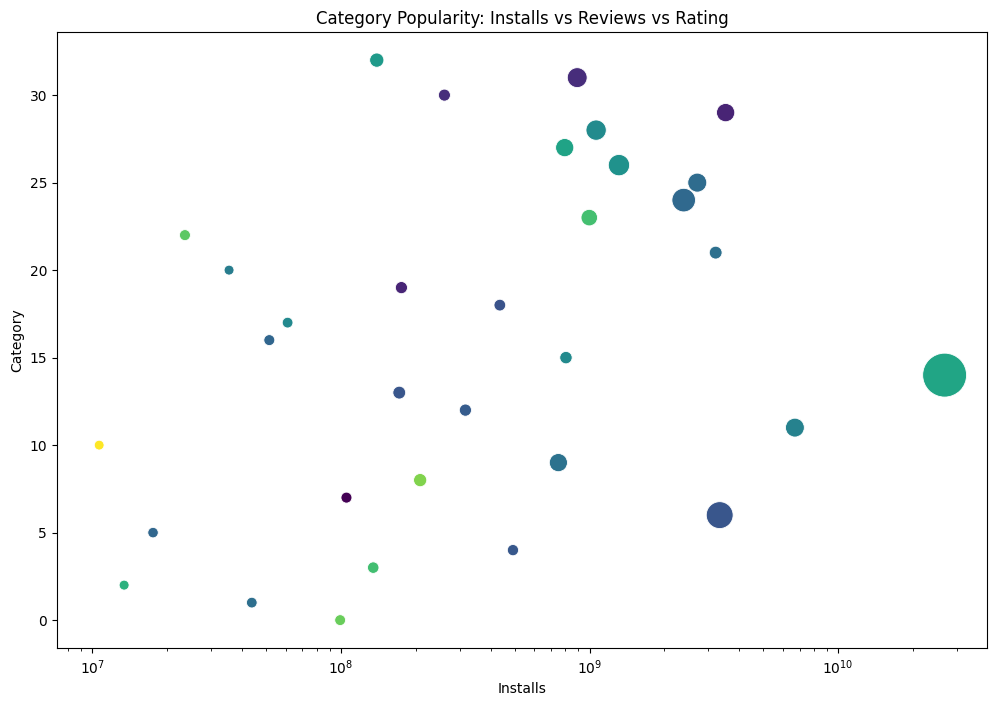

In [38]:
cat_summary = df.groupby("Category").agg({
    "Installs":"sum", "Reviews":"mean", "Rating":"mean"
}).reset_index()

plt.figure(figsize=(12,8))
sns.scatterplot(
    x="Installs", y="Category", size="Reviews", hue="Rating",
    sizes=(50, 1000), palette="viridis", data=cat_summary, legend=False
)
plt.xscale("log")
plt.title("Category Popularity: Installs vs Reviews vs Rating")
plt.show()

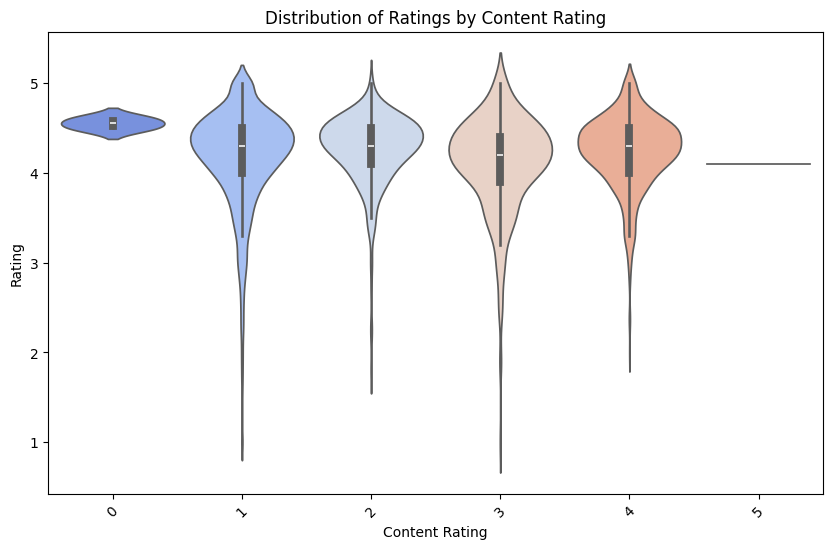

In [40]:
plt.figure(figsize=(10,6))
sns.violinplot(x="Content Rating", y="Rating", data=df, palette="coolwarm")
plt.title("Distribution of Ratings by Content Rating")
plt.xticks(rotation=45)
plt.show()

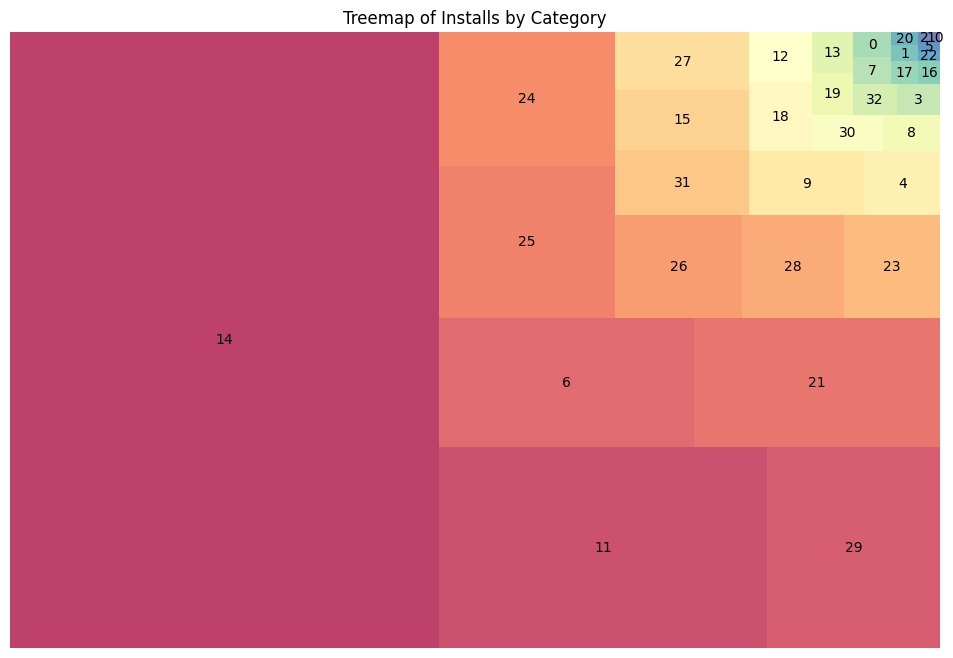

In [44]:
import squarify

cat_installs = df.groupby("Category")["Installs"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,8))
squarify.plot(sizes=cat_installs.values, label=cat_installs.index, alpha=.8, color=sns.color_palette("Spectral", len(cat_installs)))
plt.title("Treemap of Installs by Category")
plt.axis("off")
plt.show()

In [43]:
!pip install squarify

In [45]:
import plotly.express as px

fig = px.sunburst(df, path=["Category","Genres"], values="Installs",
                  color="Rating", hover_data=["Reviews"],
                  color_continuous_scale="RdYlGn",
                  title="Sunburst of Categories → Genres → Installs")
fig.show()